loading files

In [1]:
import pandas

In [2]:
path_to_snp_statistics = 'input/SNP_statistics_file.txt'
path_to_snp_call_contrast_positions = 'input/SNP_call_contrast_positions_file.txt'
path_to_cpf_csv = 'input/cpf.csv'

In [3]:
# ovaj dio ide u poseban thread jer dugo traje (zamrzavanje)
snp_statistics_df = pandas.read_csv(path_to_snp_statistics, delimiter='\t', header=0)
snp_call_contrast_positions_df = pandas.read_csv(path_to_snp_call_contrast_positions, delimiter='\t', skiprows=5, header=0)


In [4]:
#snp_call_contrast_positions_df

In [5]:
for column_name in snp_call_contrast_positions_df.columns:
    if column_name == 'probeset_id':
        pass
    else:
        name_list = column_name.split('.')
        if name_list[-1] == 'CEL_log_ratio':
            #print('preimenuj')
            #print(name_list[0])
            snp_call_contrast_positions_df.rename(columns={column_name: name_list[0]}, inplace=True)
        else:
            #print('ukloni')
            snp_call_contrast_positions_df.drop(column_name, axis=1, inplace=True)

In [6]:
#snp_call_contrast_positions_df

In [7]:
#ovaj dio mozda i ne treba
#snp_call_contrast_positions_df.to_csv(path_to_cpf_csv, index=False)

In [8]:
demo_df = pandas.merge(snp_call_contrast_positions_df, snp_statistics_df, on=['probeset_id'], how='inner')


In [9]:
#demo_df

In [10]:
#print(demo_df.shape)
#print(snp_call_contrast_positions_df.shape)
#print(snp_statistics_df.shape)

In [11]:
for index, row in demo_df.iterrows():
    if row['n_NC'] >= 20:
        demo_df.drop(index, inplace=True)
demo_df.reset_index(drop=True, inplace=True)

In [12]:
#print(demo_df.shape)

In [13]:
aa_meanx_min_value = demo_df['AA.meanX'].min()
bb_meanx_min_value = demo_df['BB.meanX'].min()
aa_meanx_max_value = demo_df['AA.meanX'].max()
bb_meanx_max_value = demo_df['BB.meanX'].max()
aa_meanx_delta = abs(aa_meanx_max_value) - abs(aa_meanx_min_value)
bb_meanx_delta = abs(bb_meanx_max_value) - abs(bb_meanx_min_value)

aa_bb = (aa_meanx_delta + bb_meanx_delta) / 2

In [14]:
print(aa_meanx_min_value)
print(bb_meanx_min_value)
print(aa_meanx_max_value)
print(bb_meanx_max_value)
print(aa_meanx_delta)
print(bb_meanx_delta)
print(aa_bb)


-1.171
-4.41
4.859
1.603
3.6879999999999997
-2.8070000000000004
0.44049999999999967


In [15]:
for index, row in demo_df.iterrows():
    demo_df.at[index, 'AA-BB'] = demo_df.at[index, 'AA.meanX'] - demo_df.at[index, 'BB.meanX']
    if demo_df.at[index, 'AA-BB'] < aa_bb:
        demo_df.drop(index, inplace=True)
demo_df.reset_index(drop=True, inplace=True)

In [16]:
#demo_df

In [17]:
columns_to_remove = ['n_NC', 'AA.meanX', 'AA.varX', 'AB.meanX', 'BB.meanX', 'BB.varX', 'AA-BB']
demo_df.drop(columns=columns_to_remove, inplace=True)

In [18]:
demo_df

,probeset_id,Bobovec,Funtaca,Lederka,Pink lady,Sarija,Ananas,Carkonstatin,Ljutika,Ranka,...,Pilot,Samoniklica,Amerikanka,Butulija,Lorinka,Prisatka,Adamcica,Crvena ribnjaca,Meglena,Zuta zimska
0,AX-105174114,2.884,3.462,0.127,0.148,3.155,-1.331,-0.770,0.393,2.748,...,0.085,2.906,0.015,0.099,3.407,-0.065,-1.414,2.693,-0.327,0.906
1,AX-105174161,-2.424,-0.496,0.387,-2.305,-2.478,-0.042,-2.556,-0.460,-2.131,...,-2.589,0.156,-2.468,-2.357,1.037,0.019,-2.581,-2.495,0.403,-0.705
2,AX-105174183,2.936,0.806,-2.092,-2.625,0.064,-2.607,-2.596,-3.356,0.121,...,-2.010,2.557,-0.090,-1.868,-1.077,0.116,-0.082,-2.033,-0.014,-0.740
3,AX-105174256,-1.581,-1.716,-1.692,-1.548,-1.785,2.721,-1.887,-1.664,-1.532,...,-1.745,-1.582,-1.902,-1.644,-2.001,-1.798,-1.781,-1.668,-1.703,-1.801
4,AX-105174258,2.401,1.920,2.707,2.453,2.131,2.425,2.167,2.247,2.346,...,2.053,2.271,2.110,0.640,1.722,2.046,1.735,2.091,-0.676,2.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370142,AX-115664678,-2.218,-2.336,-1.994,-1.826,-2.129,-1.614,-2.495,-2.408,-1.738,...,0.399,-1.916,-2.261,-2.000,-2.616,-2.050,-2.273,-1.966,-2.371,-2.170
370143,AX-115664682,2.849,2.884,2.699,1.994,2.578,-0.370,3.109,2.910,2.439,...,2.825,2.709,2.629,2.622,3.013,2.725,2.704,2.552,2.550,-1.803
370144,AX-115664693,-3.321,-3.213,-3.128,-2.930,-3.390,-2.761,-3.437,-3.343,-3.054,...,-3.234,-2.935,0.777,-3.237,-3.502,-3.035,-3.000,-0.077,-3.227,-3.369
370145,AX-86877577,2.665,2.433,2.454,-1.599,-1.860,0.694,-0.307,-0.370,0.102,...,-1.485,0.209,-1.630,2.468,-0.439,0.221,-1.668,0.133,0.269,-0.293


In [19]:
columns_to_remove = ['probeset_id']
demo_df.drop(columns=columns_to_remove, inplace=True)

In [20]:
demo_df

,Bobovec,Funtaca,Lederka,Pink lady,Sarija,Ananas,Carkonstatin,Ljutika,Ranka,Adamovka petrovka,...,Pilot,Samoniklica,Amerikanka,Butulija,Lorinka,Prisatka,Adamcica,Crvena ribnjaca,Meglena,Zuta zimska
0,2.884,3.462,0.127,0.148,3.155,-1.331,-0.770,0.393,2.748,-1.183,...,0.085,2.906,0.015,0.099,3.407,-0.065,-1.414,2.693,-0.327,0.906
1,-2.424,-0.496,0.387,-2.305,-2.478,-0.042,-2.556,-0.460,-2.131,-2.291,...,-2.589,0.156,-2.468,-2.357,1.037,0.019,-2.581,-2.495,0.403,-0.705
2,2.936,0.806,-2.092,-2.625,0.064,-2.607,-2.596,-3.356,0.121,0.107,...,-2.010,2.557,-0.090,-1.868,-1.077,0.116,-0.082,-2.033,-0.014,-0.740
3,-1.581,-1.716,-1.692,-1.548,-1.785,2.721,-1.887,-1.664,-1.532,-1.583,...,-1.745,-1.582,-1.902,-1.644,-2.001,-1.798,-1.781,-1.668,-1.703,-1.801
4,2.401,1.920,2.707,2.453,2.131,2.425,2.167,2.247,2.346,2.195,...,2.053,2.271,2.110,0.640,1.722,2.046,1.735,2.091,-0.676,2.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370142,-2.218,-2.336,-1.994,-1.826,-2.129,-1.614,-2.495,-2.408,-1.738,0.362,...,0.399,-1.916,-2.261,-2.000,-2.616,-2.050,-2.273,-1.966,-2.371,-2.170
370143,2.849,2.884,2.699,1.994,2.578,-0.370,3.109,2.910,2.439,2.488,...,2.825,2.709,2.629,2.622,3.013,2.725,2.704,2.552,2.550,-1.803
370144,-3.321,-3.213,-3.128,-2.930,-3.390,-2.761,-3.437,-3.343,-3.054,-2.816,...,-3.234,-2.935,0.777,-3.237,-3.502,-3.035,-3.000,-0.077,-3.227,-3.369
370145,2.665,2.433,2.454,-1.599,-1.860,0.694,-0.307,-0.370,0.102,0.328,...,-1.485,0.209,-1.630,2.468,-0.439,0.221,-1.668,0.133,0.269,-0.293


In [21]:
import matplotlib.pyplot as plt

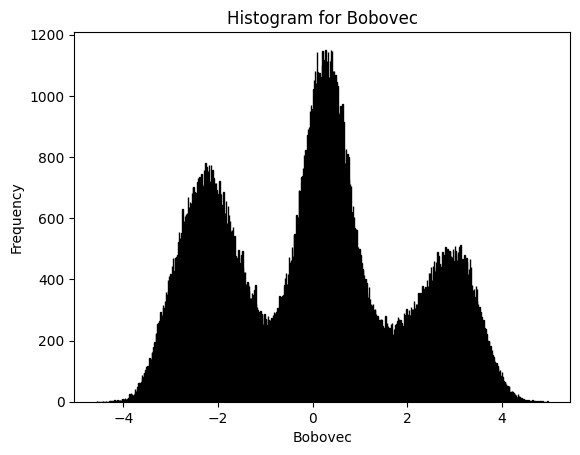

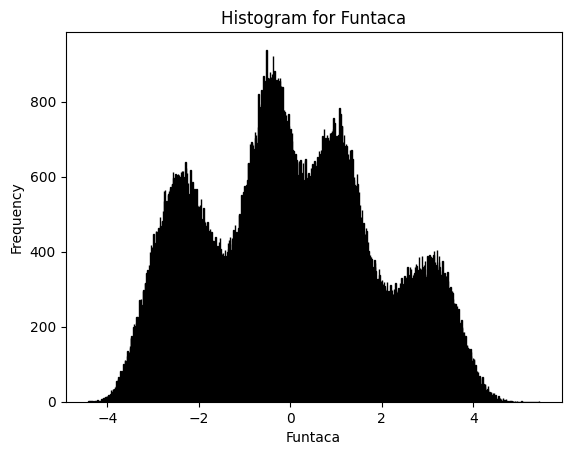

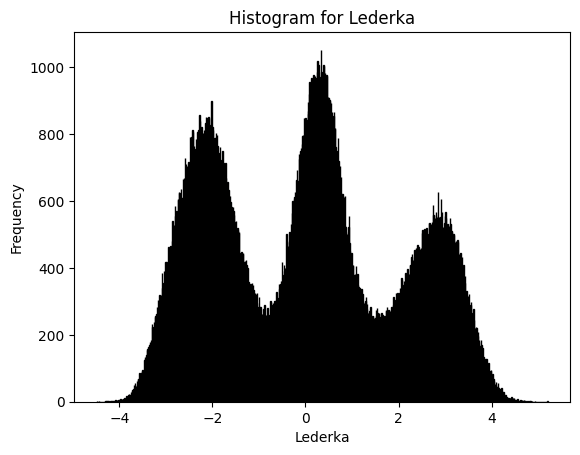

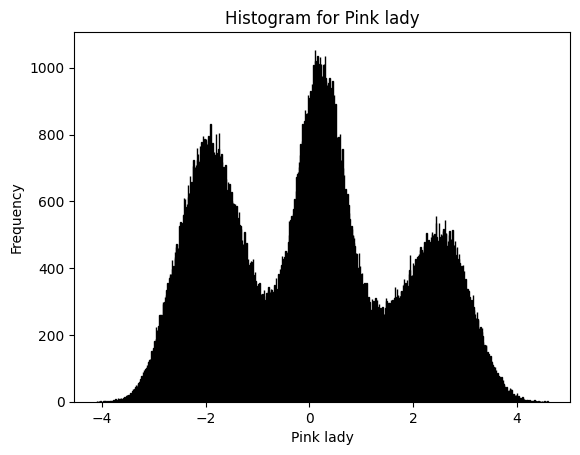

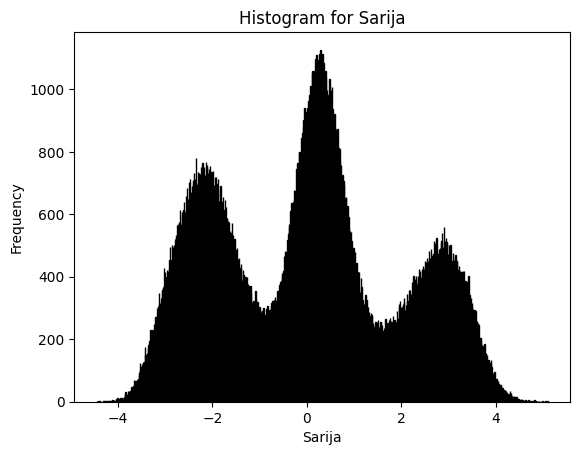

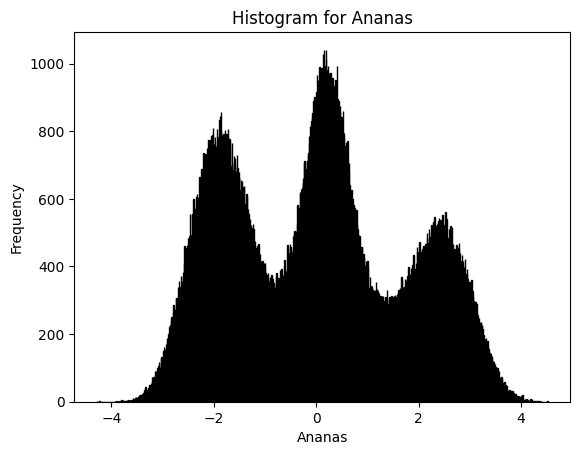

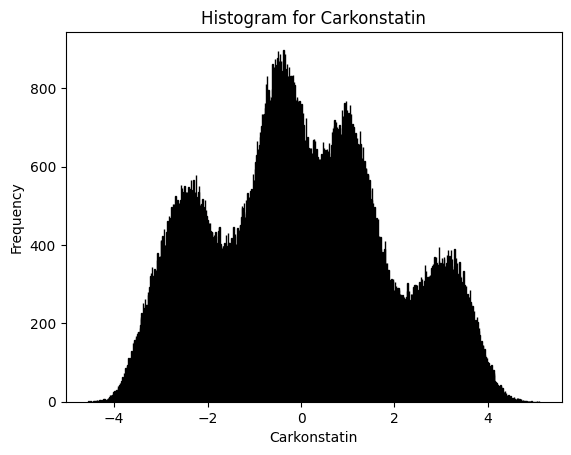

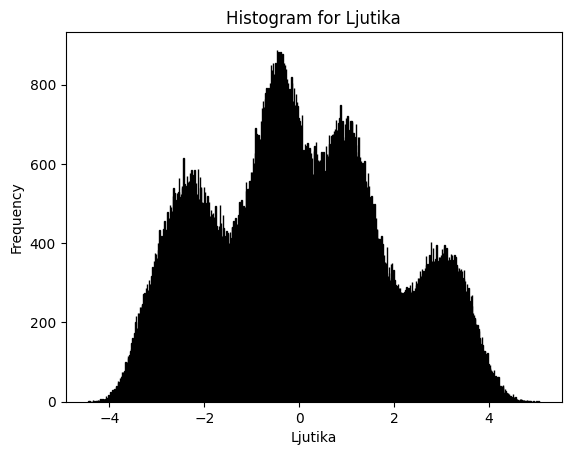

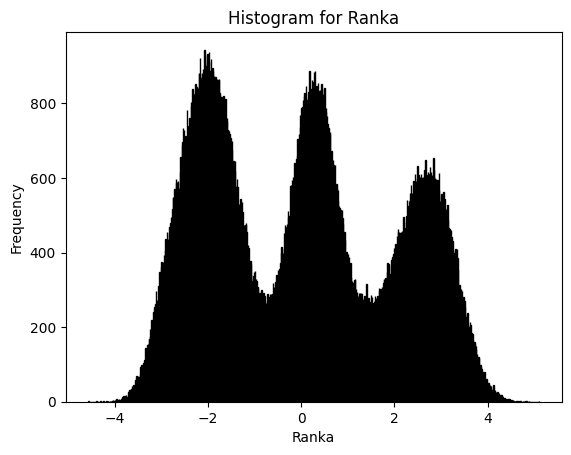

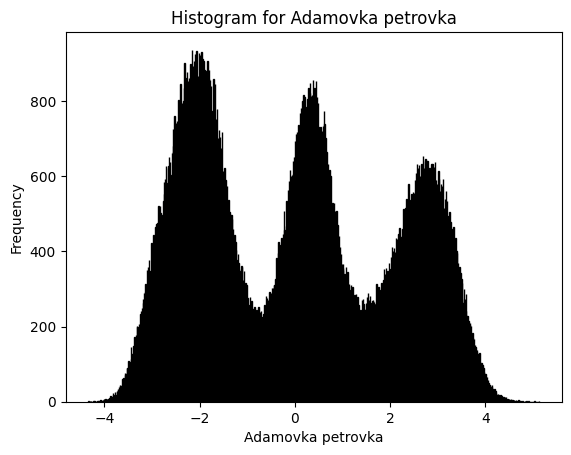

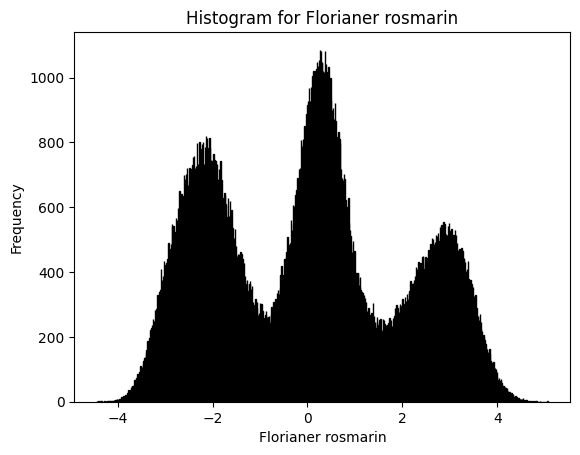

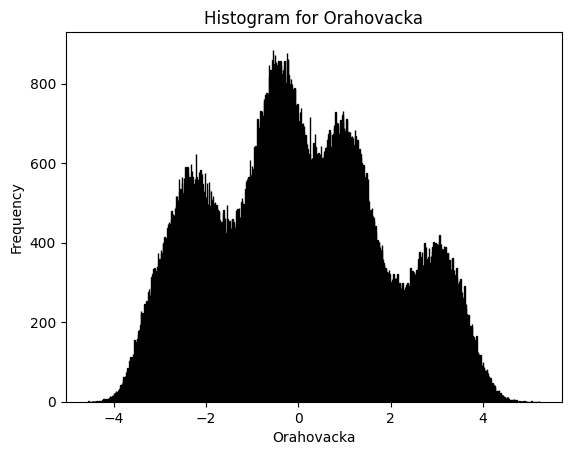

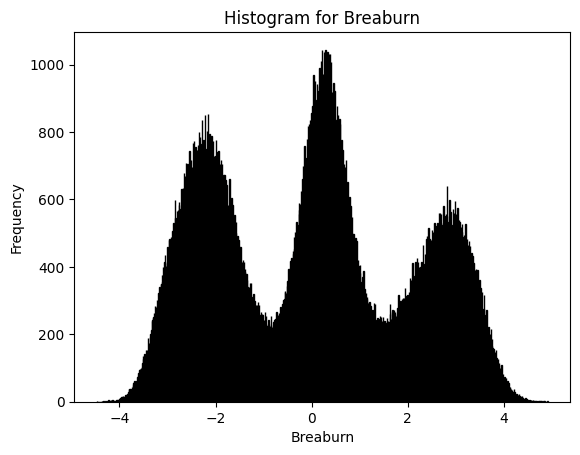

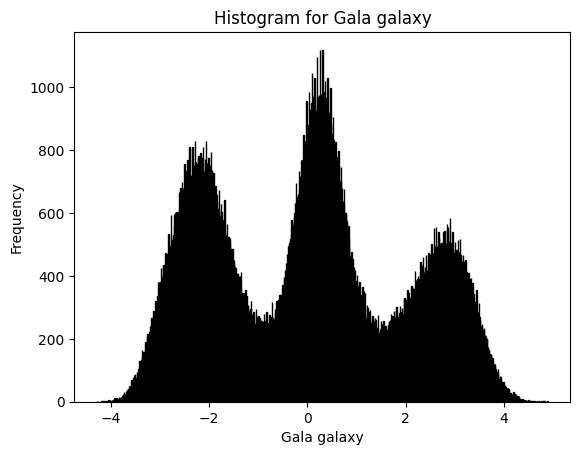

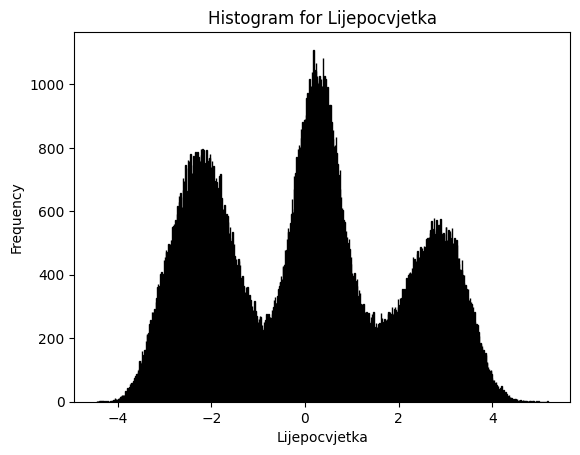

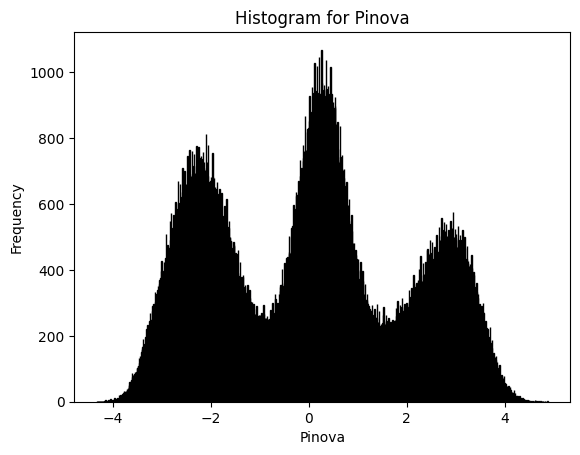

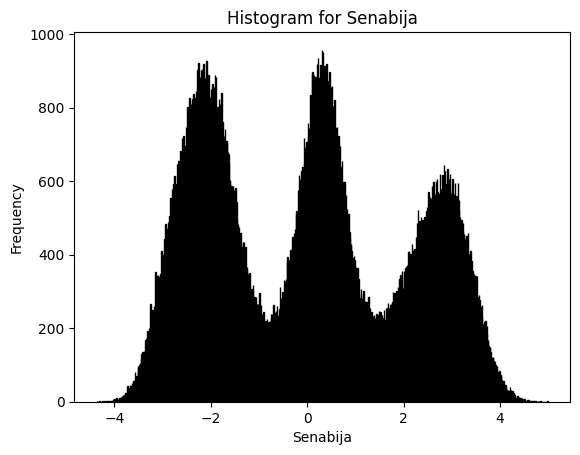

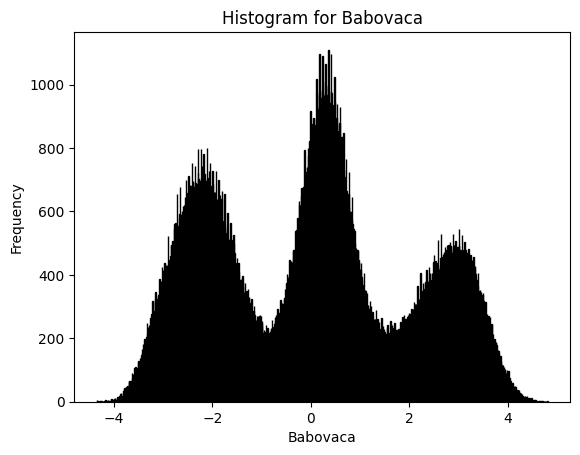

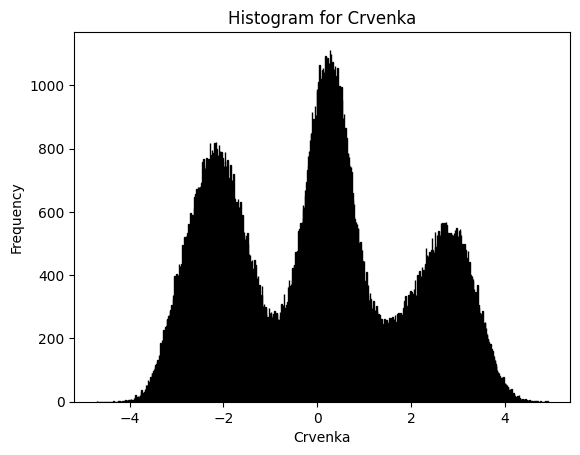

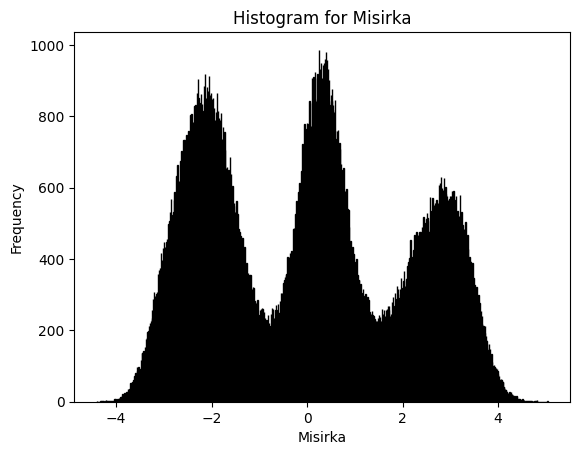

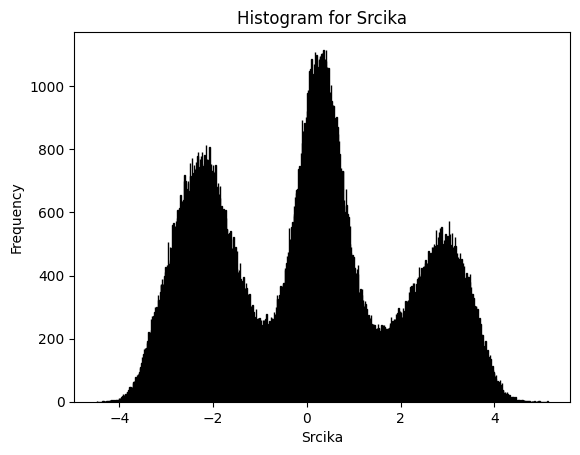

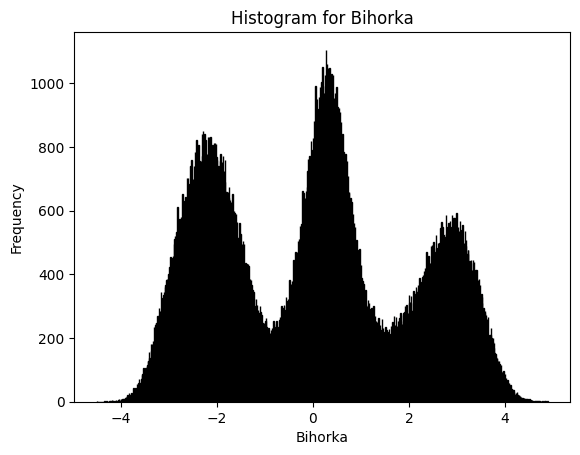

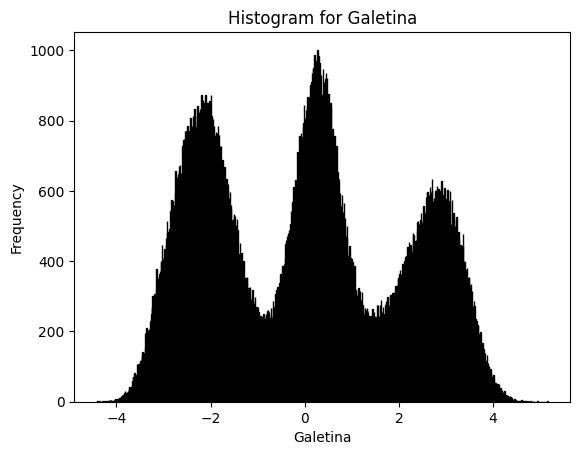

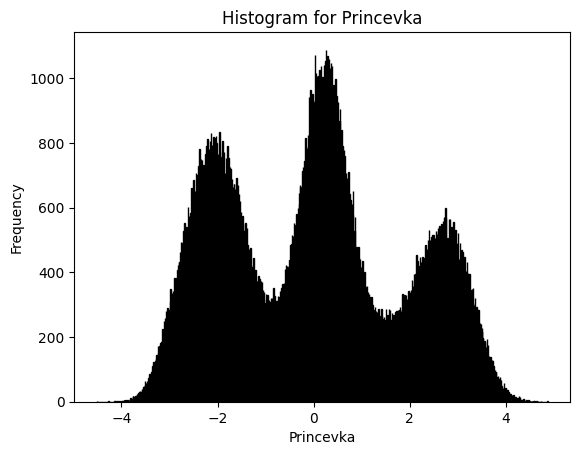

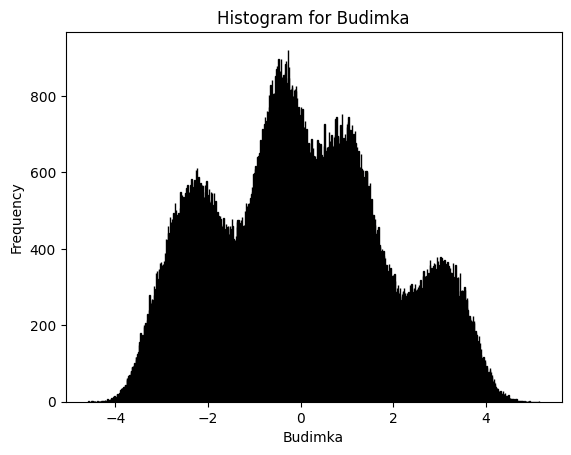

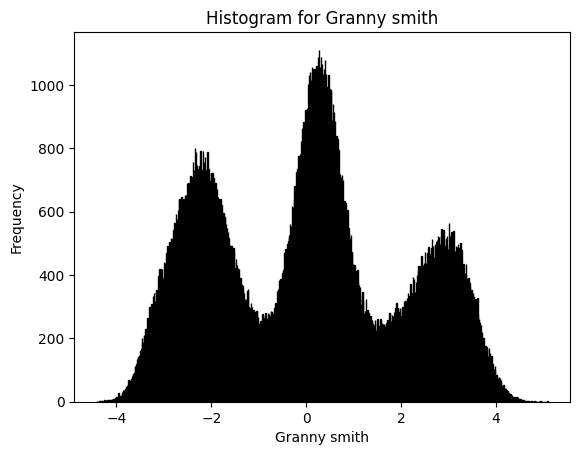

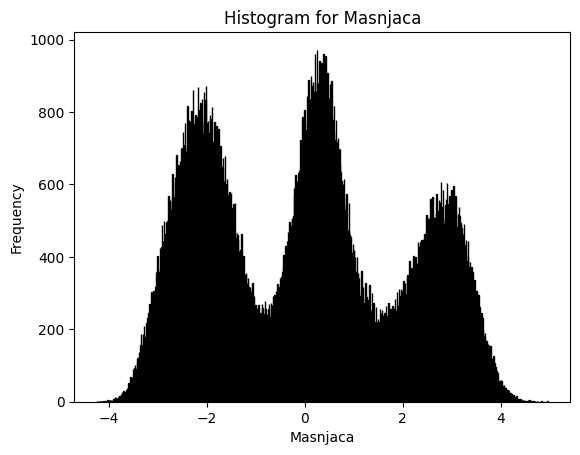

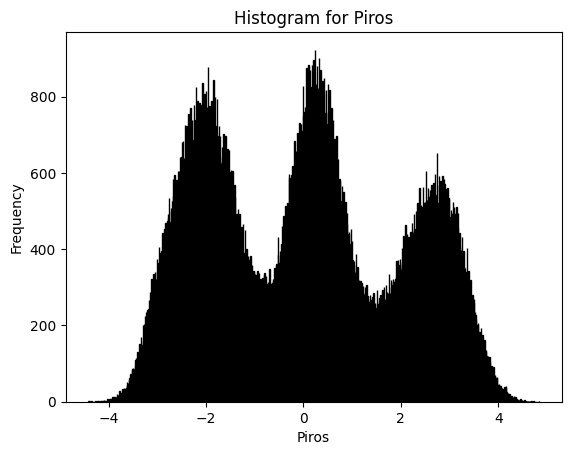

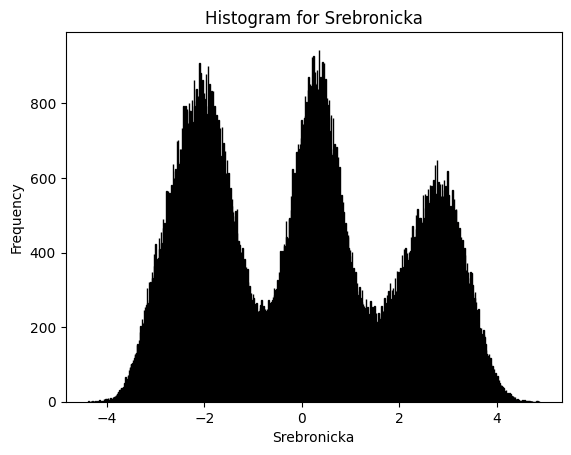

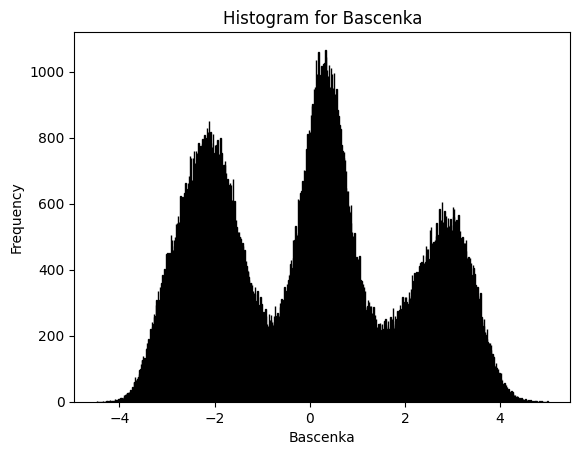

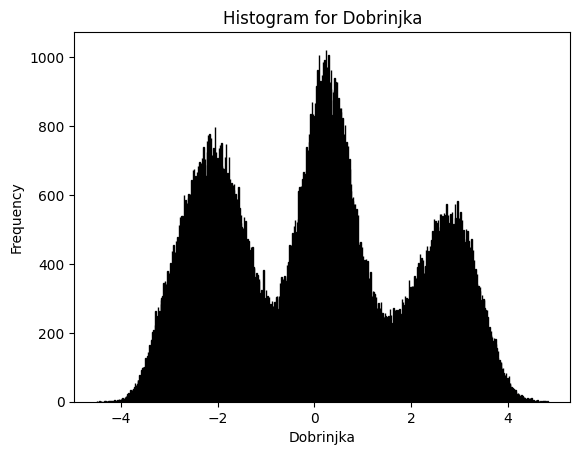

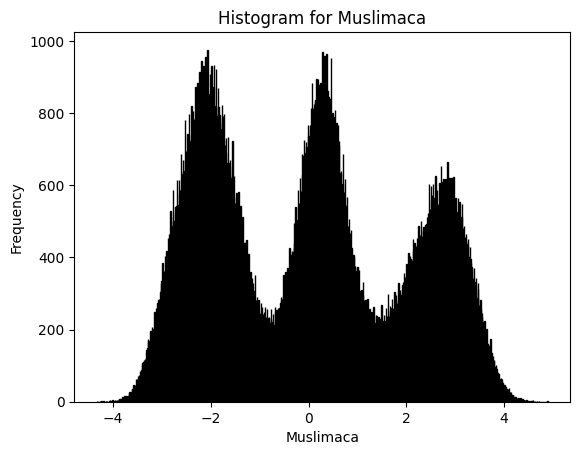

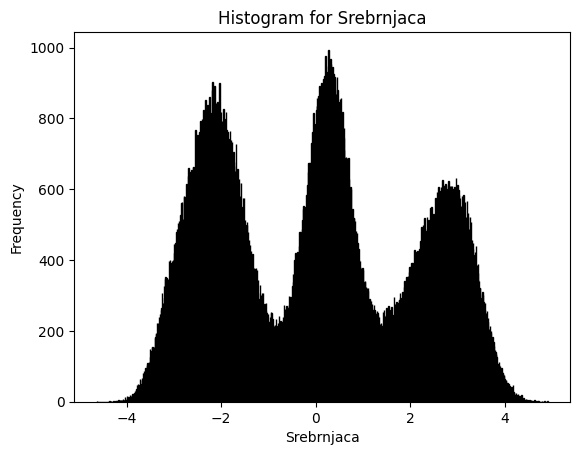

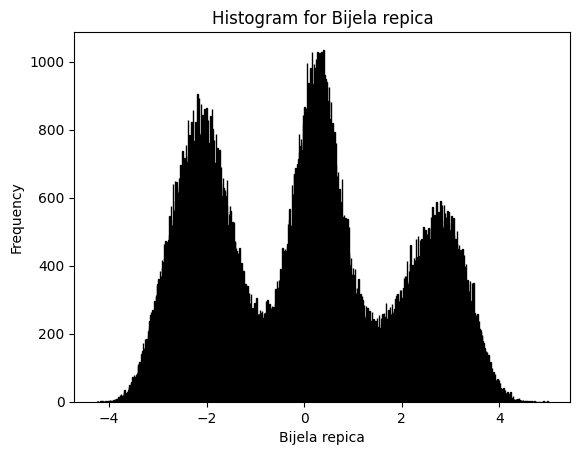

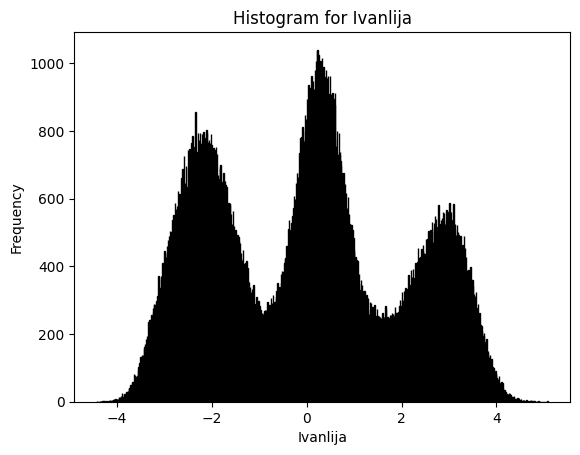

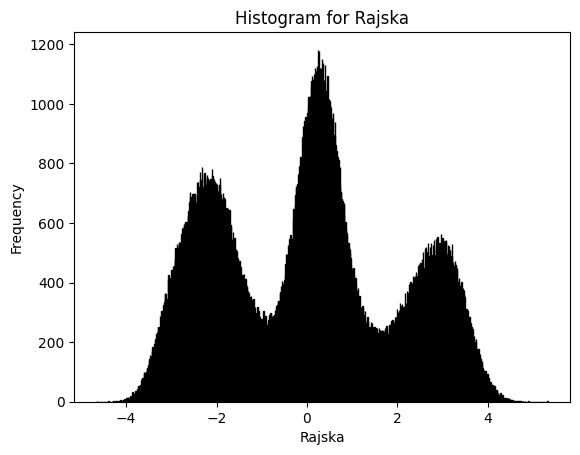

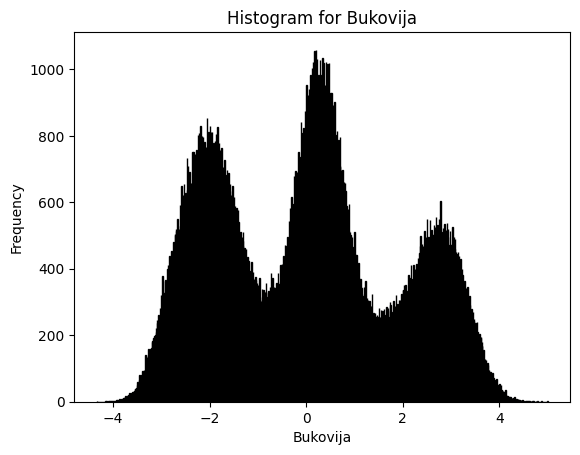

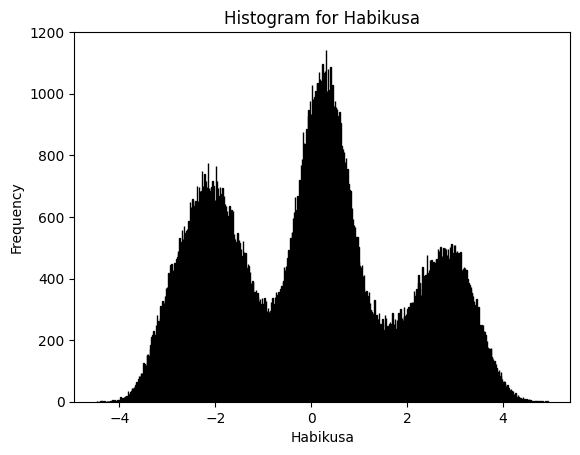

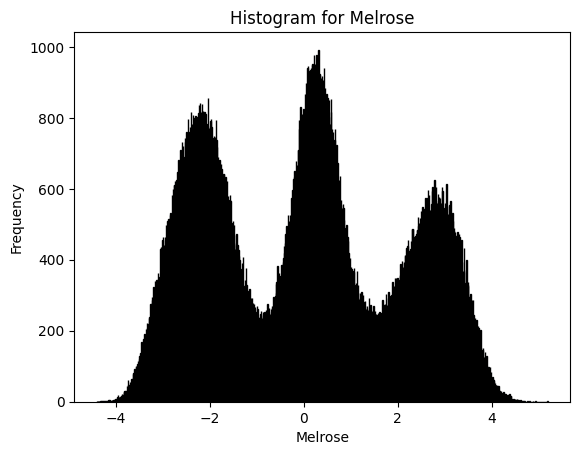

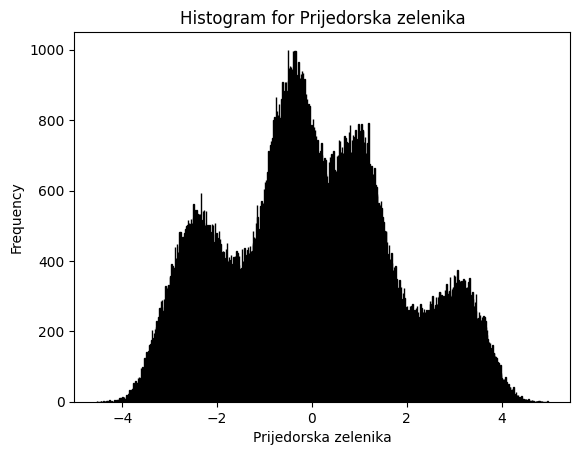

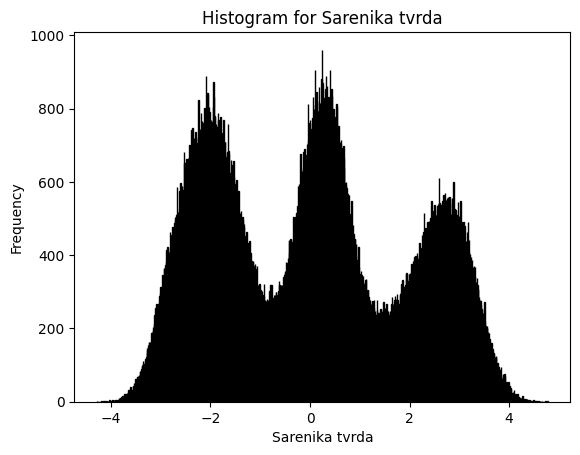

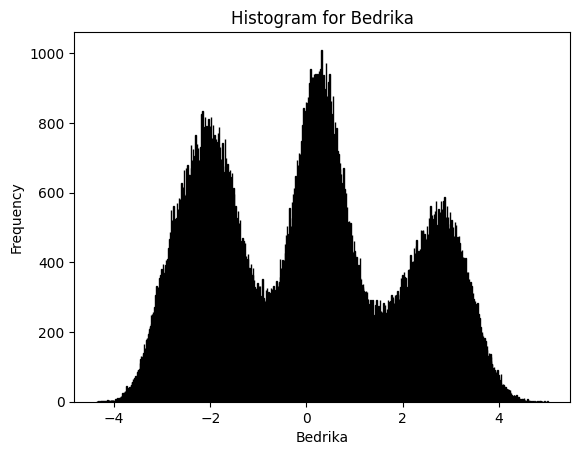

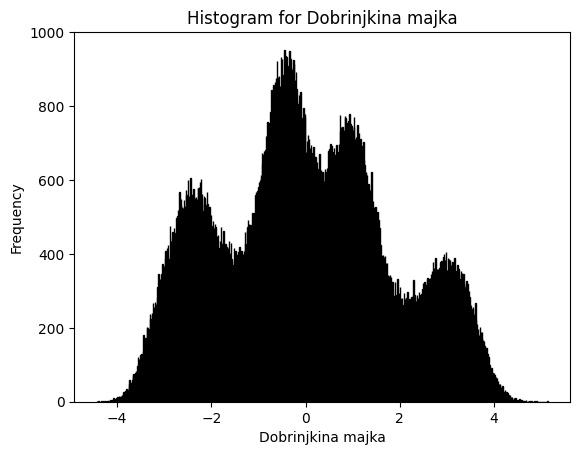

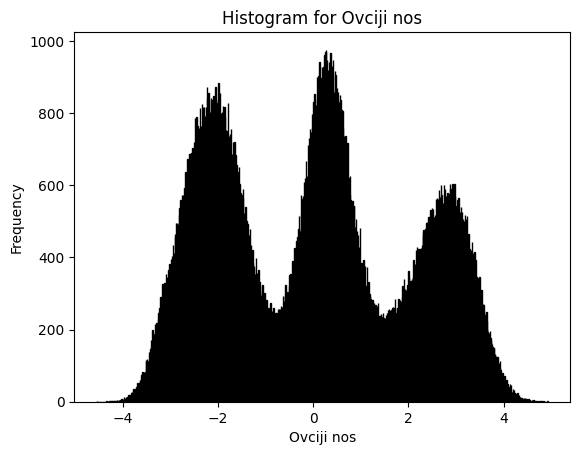

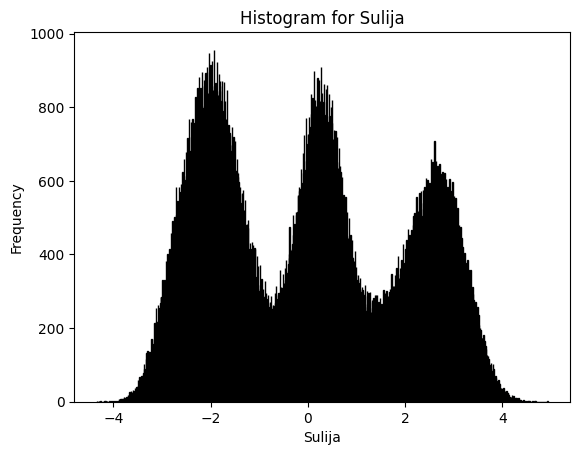

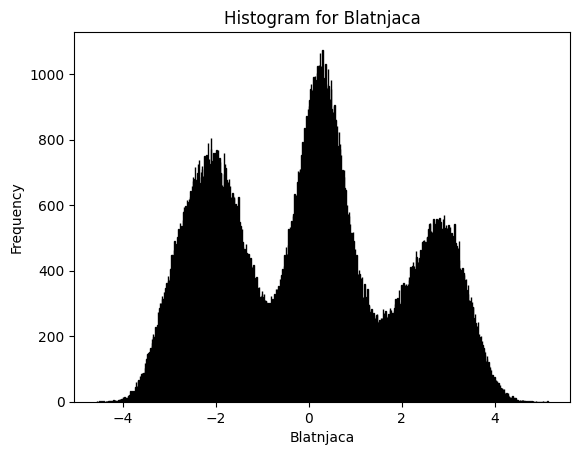

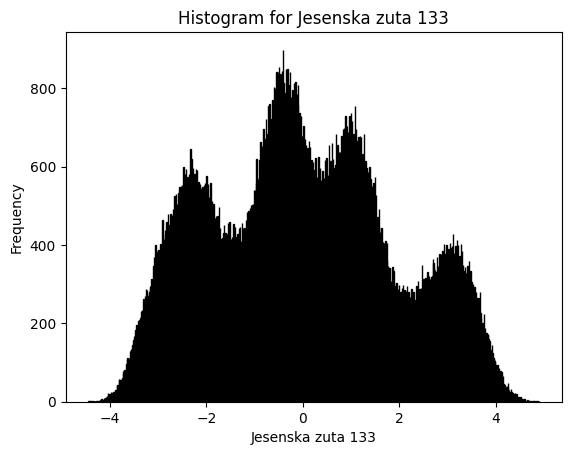

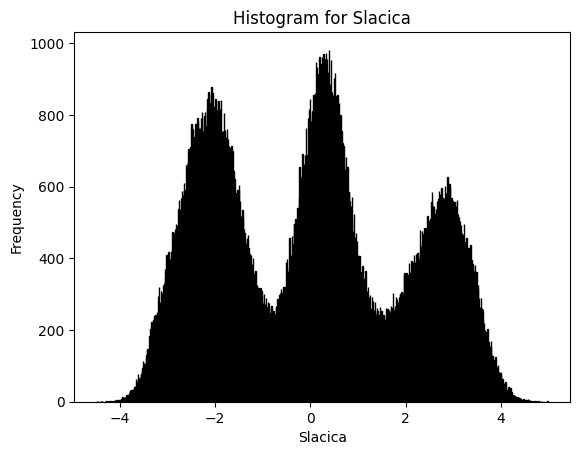

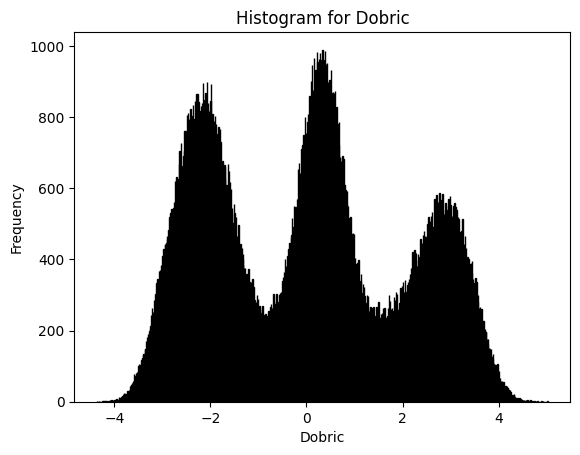

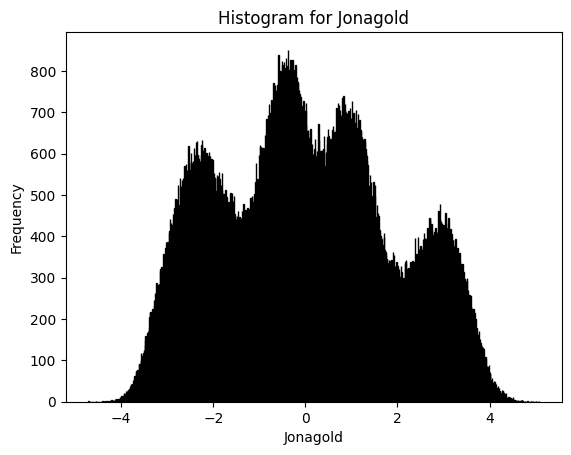

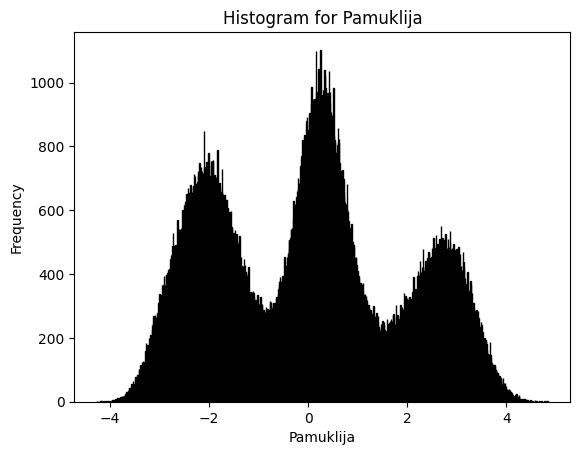

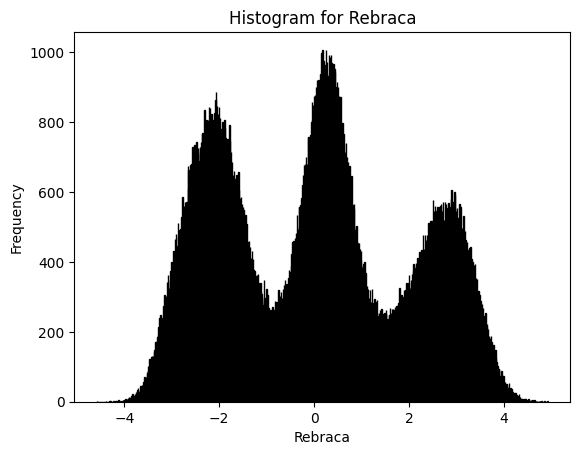

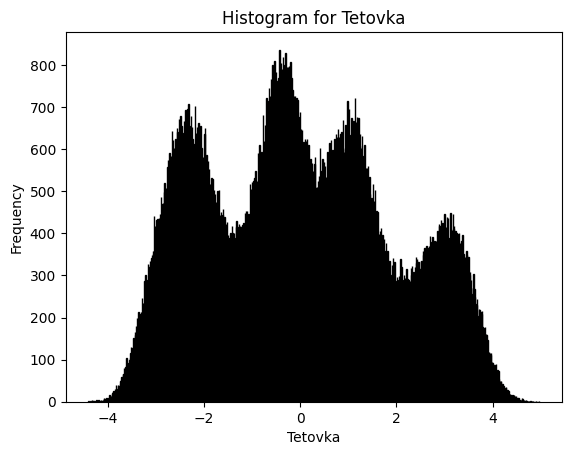

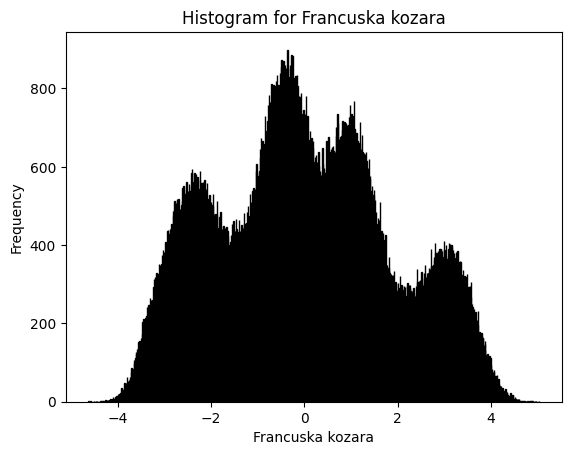

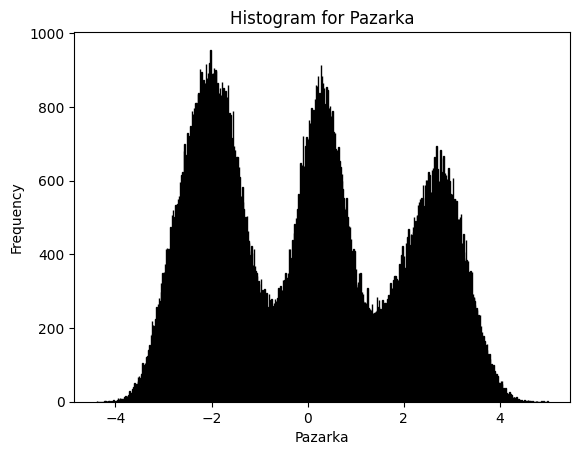

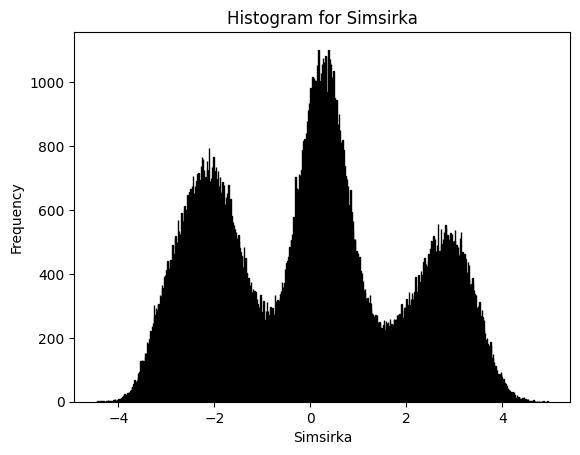

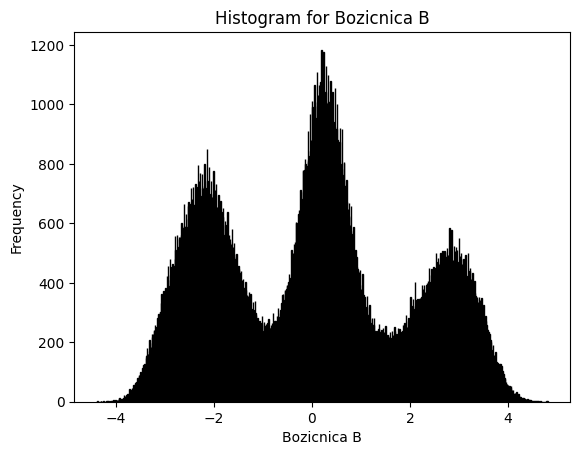

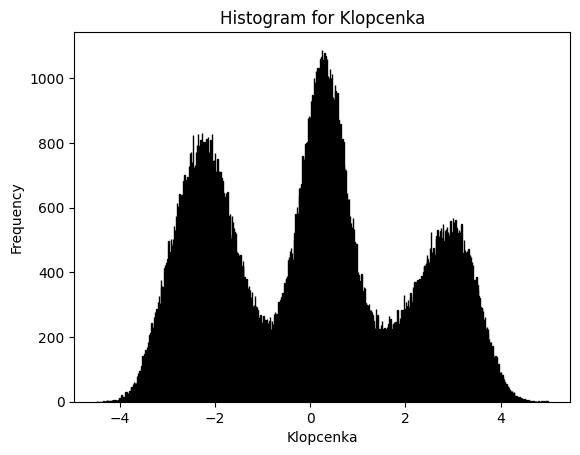

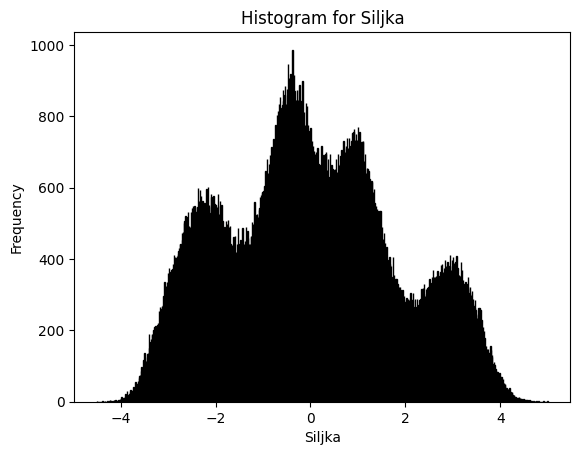

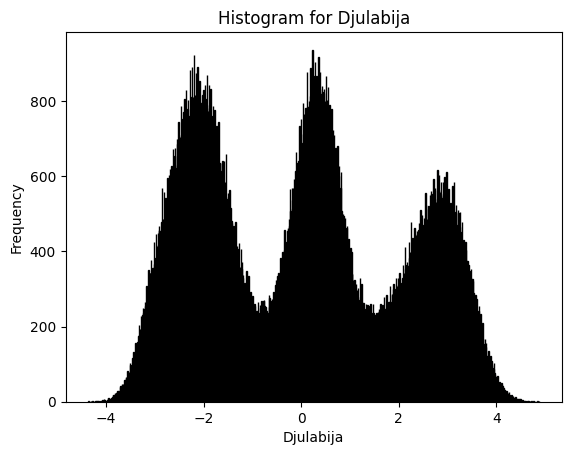

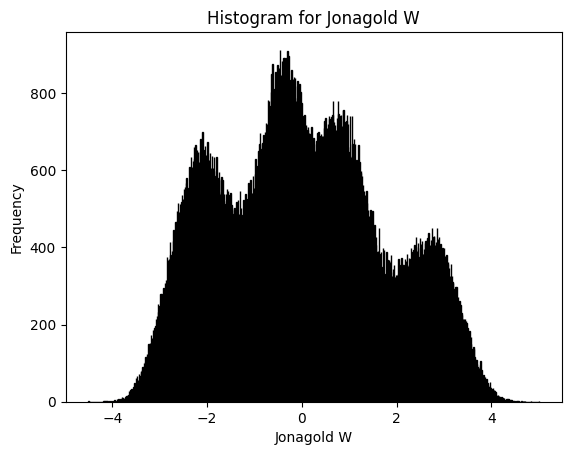

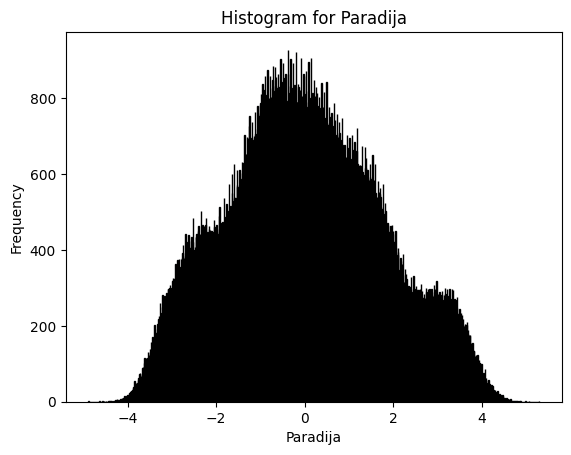

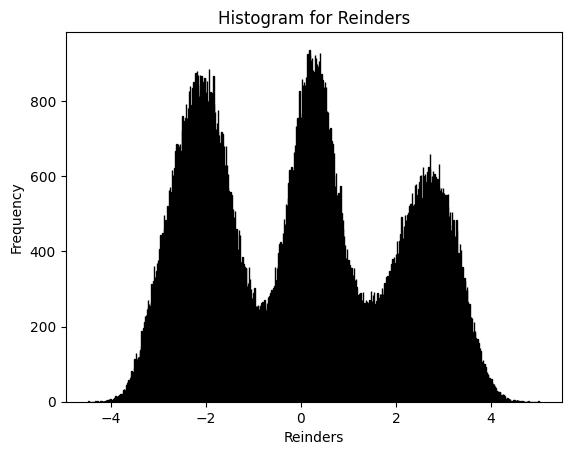

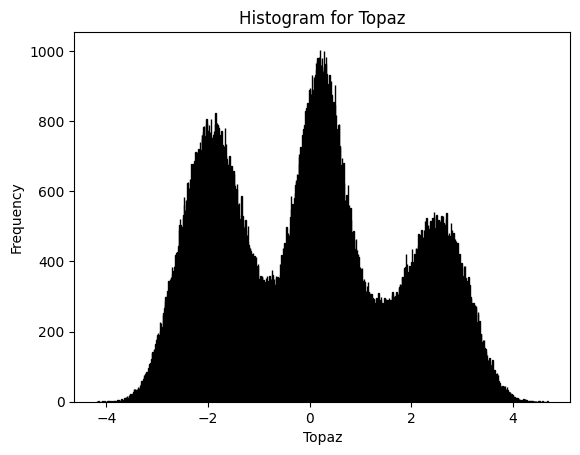

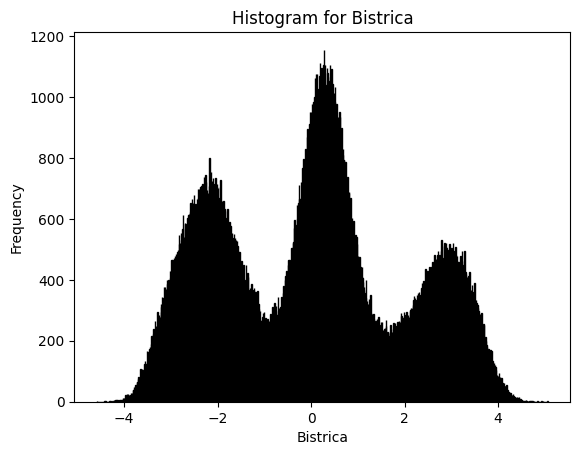

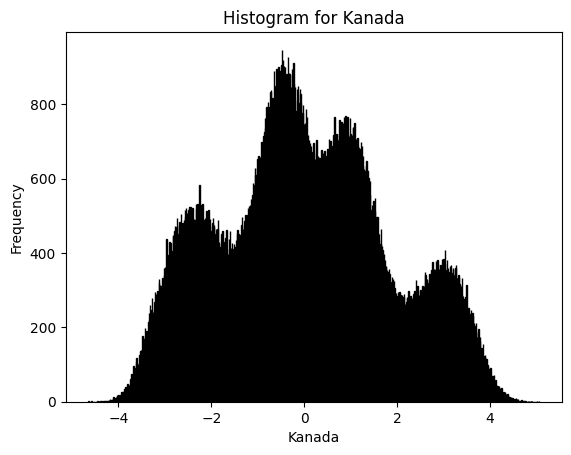

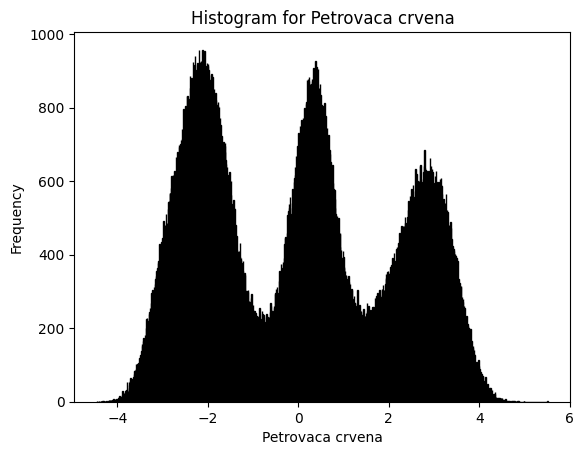

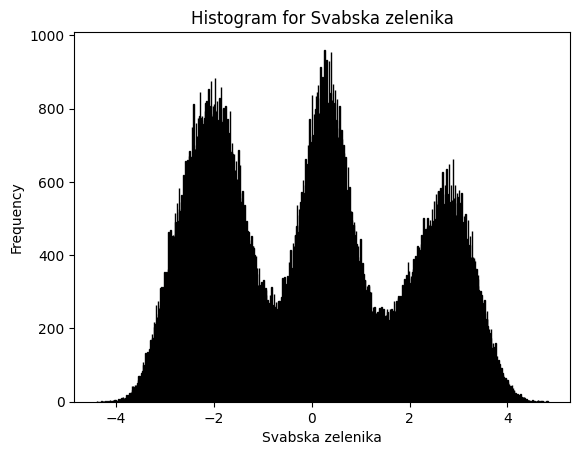

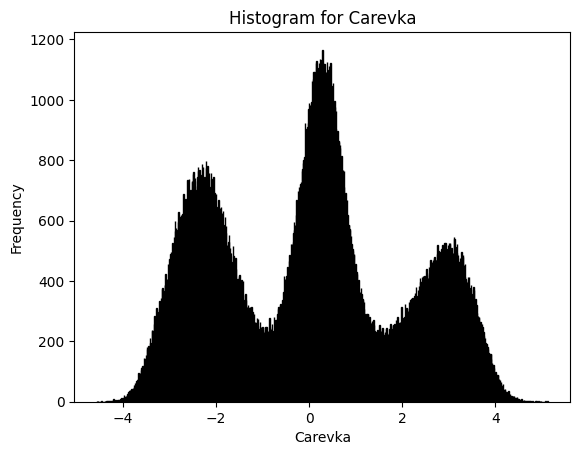

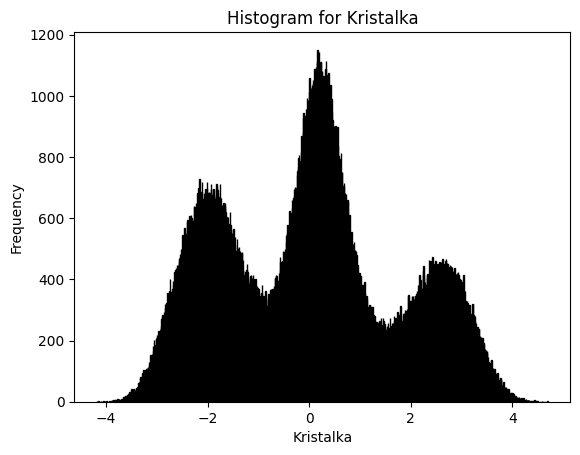

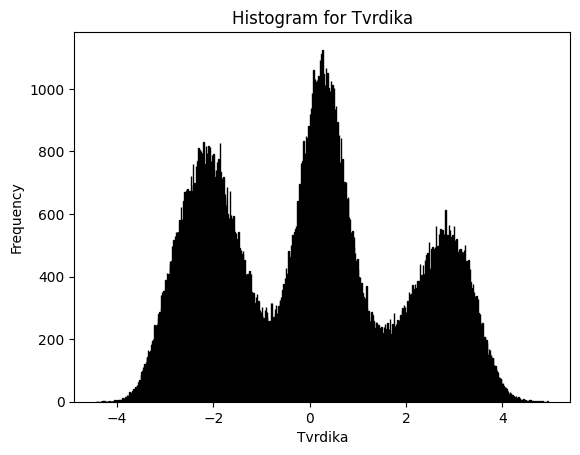

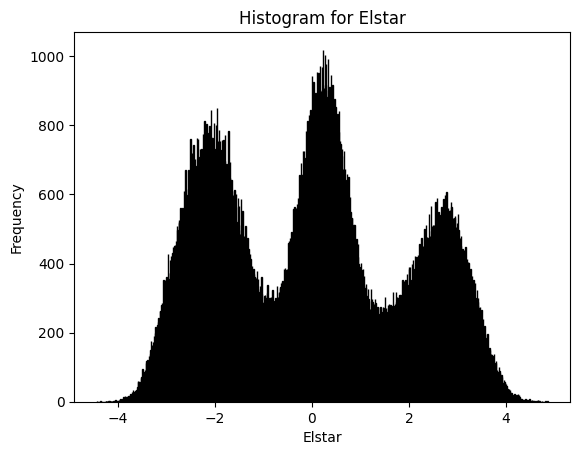

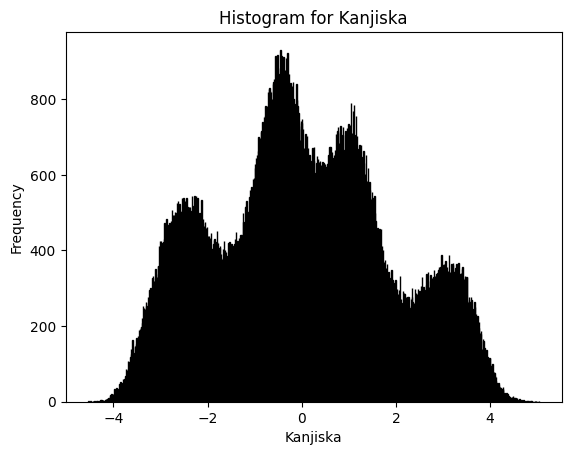

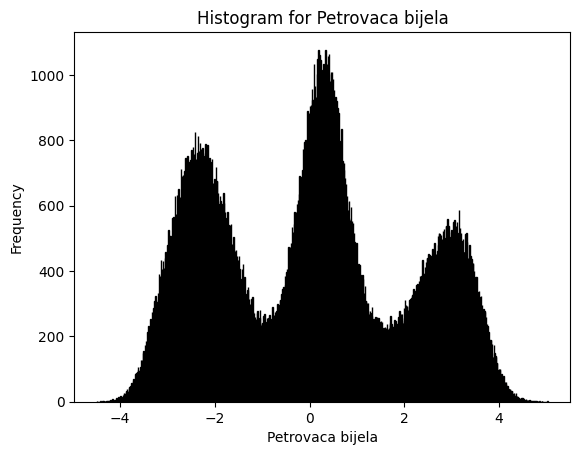

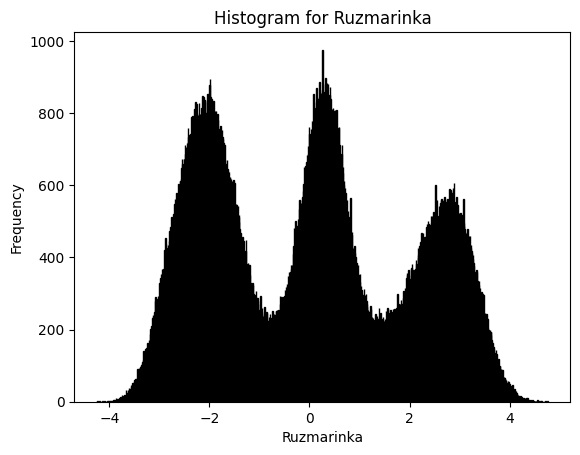

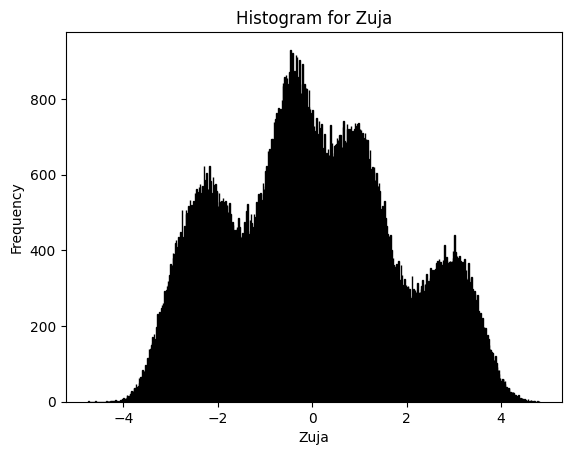

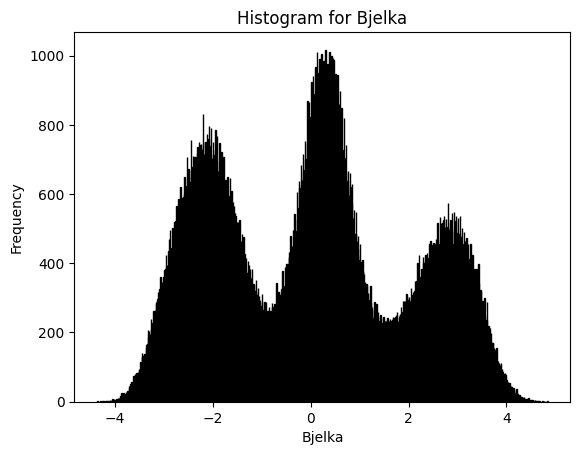

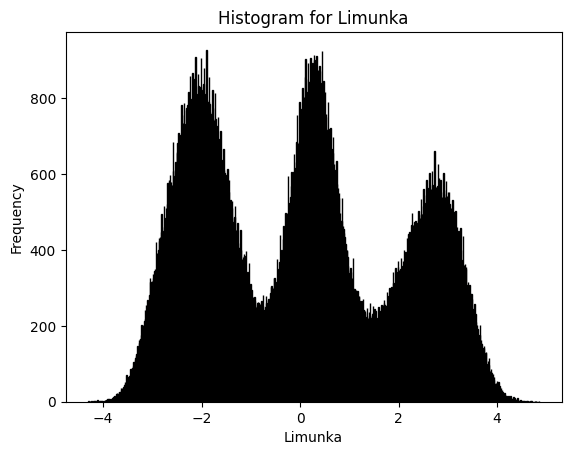

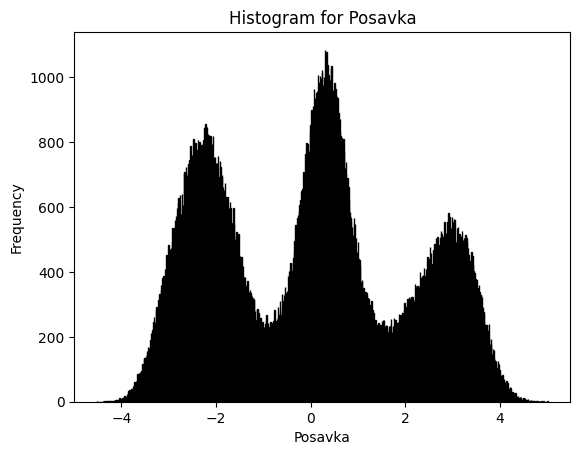

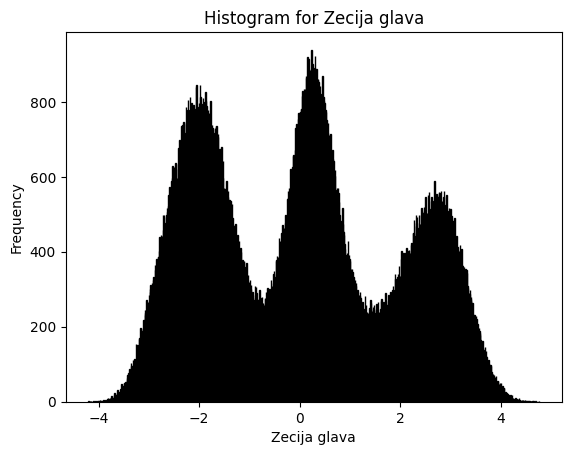

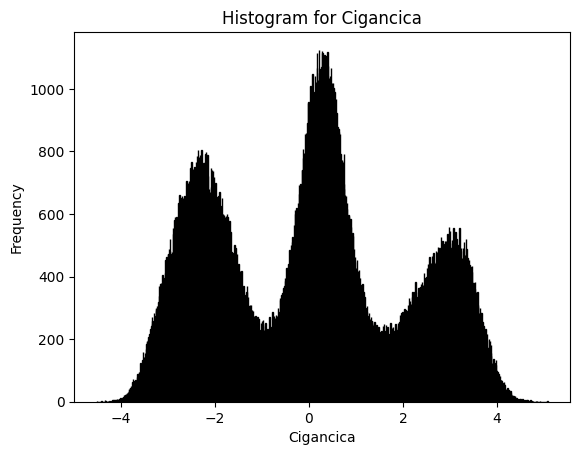

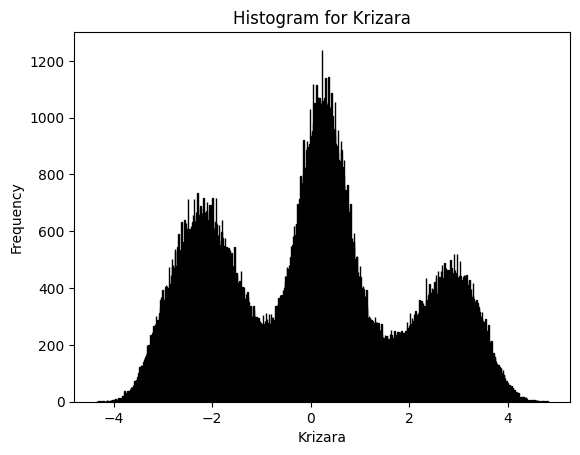

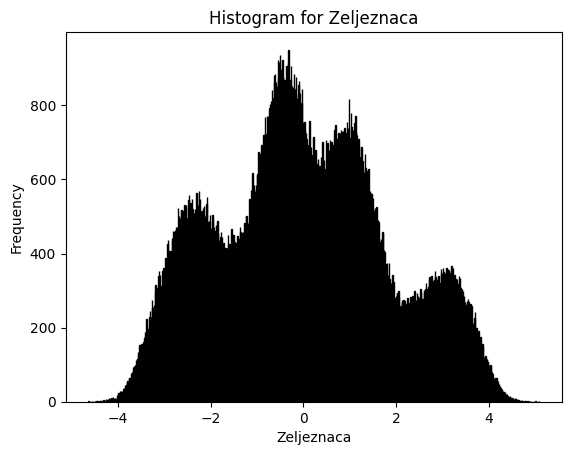

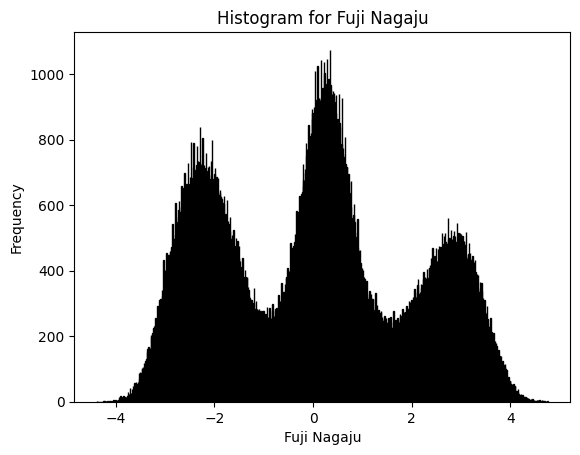

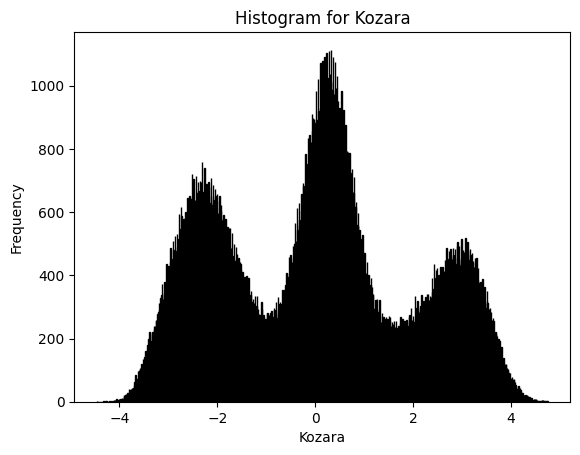

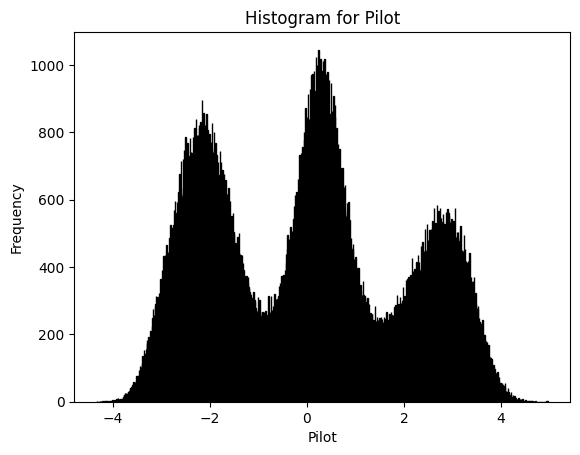

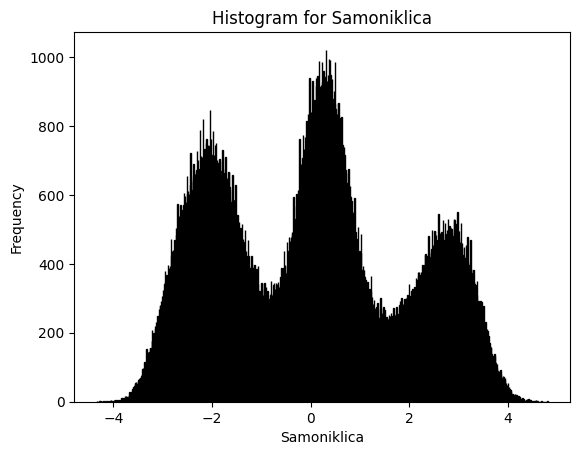

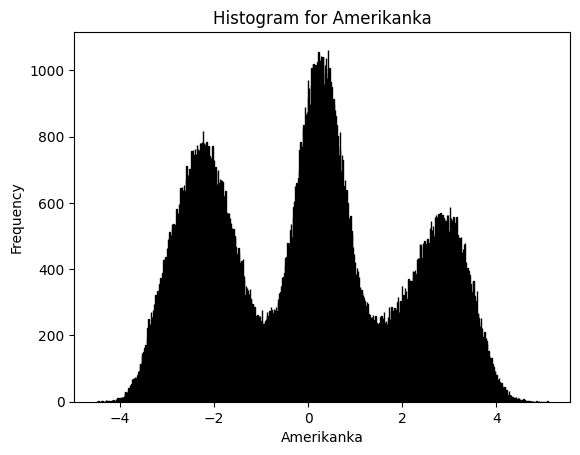

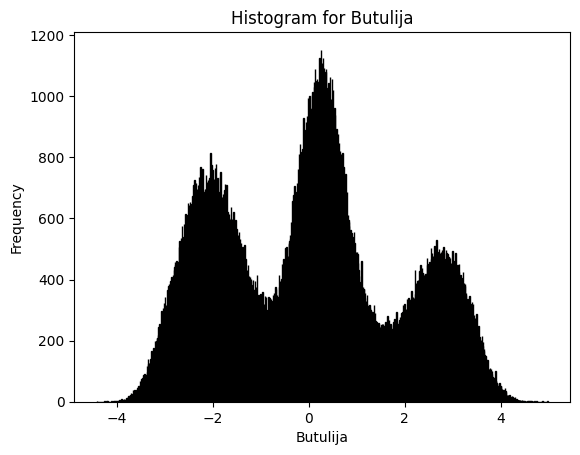

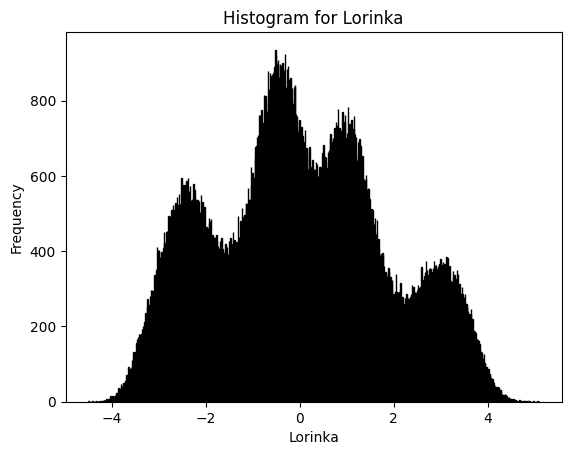

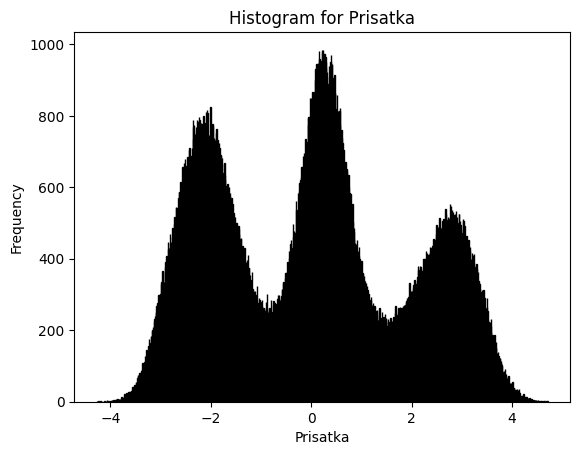

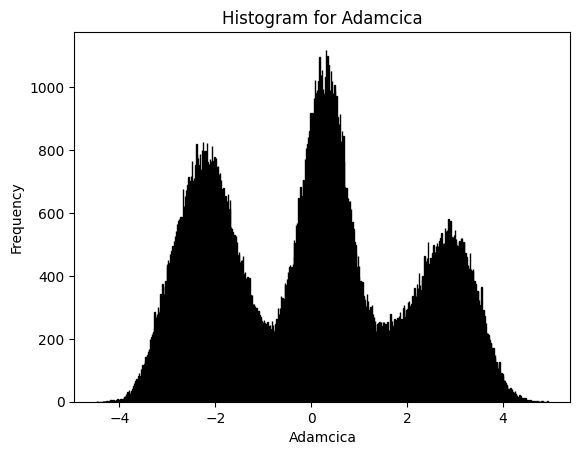

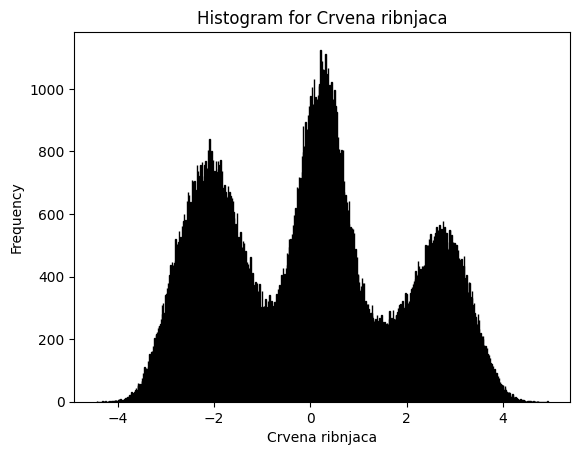

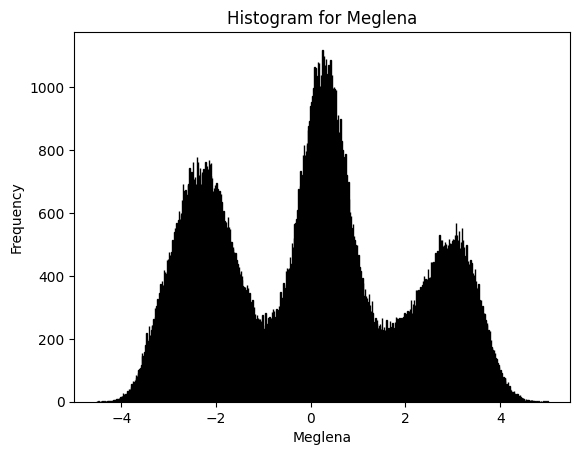

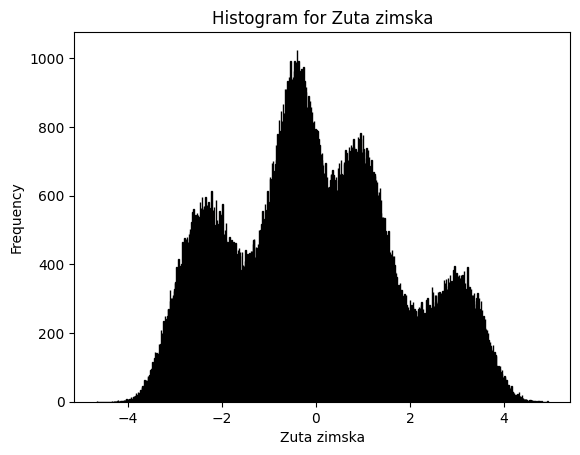

In [23]:
output_directory = 'histograms'
import os
os.makedirs(output_directory, exist_ok=True)
for column in demo_df.columns:
    plt.hist(demo_df[column], bins=1000, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    output_file_path = os.path.join(output_directory, f'{column}_histogram.png')
    plt.savefig(output_file_path, bbox_inches='tight')
    plt.show()
    plt.clf()
plt.close('all')